# Language distribution of the leaflets 1933-1946

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
# Dataset 1933-1946 before preprocessing to include all pages
df = pd.read_csv('../Materials/Dataset1933_1946.csv', sep='\t', encoding='Latin-1', index_col=False)
sns.set_palette("Set2")
df.head()

,Image,Collection,Production,Date,Occasion,Leaflet_Language,Opmerking
0,0001_Untitled document_00002-20230218_101358.jpg,1933-1934,NaN,NaN,NaN,NaN,NaN
1,0002_Untitled document_00003-20230218_101416.jpg,1933-1934,NaN,NaN,NaN,NaN,NaN
2,0003_Untitled document_00004-20230218_102224.jpg,1933-1934,NaN,NaN,NaN,NaN,NaN
3,0004_Untitled document_00005-20230218_102247.jpg,1933-1934,Middernachtstango,9/9/1933,NaN,Dutch,Meerdere data: staan niet vermeld
4,0005_Untitled document_00006-20230218_102503.jpg,1933-1934,NaN,NaN,NaN,NaN,NaN


In [3]:
df.shape

(6207, 7)

In [4]:
#strip leading and trailing whitespaces
for column in df.columns:
    try:
        df[column] = df[column].str.strip()
    except AttributeError:
        continue

In [5]:
#convert date to datetime
df['Date'] = pd.to_datetime(df['Date'], dayfirst=True, errors='coerce')

In [6]:
# Remove rows with NaN values in the 'Leaflet_Language' column
df = df.dropna(subset=['Leaflet_Language'])

In [7]:
df.shape

(5683, 7)

In [8]:
# Leaflet languages in the dataset
df['Leaflet_Language'].value_counts()

Dutch             4837
German             751
Dutch + German      34
Dutch + French      30
French              26
Italian              5
Name: Leaflet_Language, dtype: int64

In [9]:
# Select only 1940 to 1945
seasons_during_war = ['1940-1941', '1941-1942', '1942-1943', '1943-1944', '1944-1945']

# Filter DataFrame for seasons during the war
df_during_war = df[df['Collection'].isin(seasons_during_war)]

df_during_war['Leaflet_Language'].value_counts()

Dutch             1422
German             692
Dutch + German      25
Name: Leaflet_Language, dtype: int64

## Preprocessing 1933-1946

In [10]:
counts = df.groupby('Collection')['Leaflet_Language'].value_counts().unstack().fillna(0)
#Use grouby, unstack and fillna so that zero is displayed when a language is not featured in a group (season).

# To maintain readability of the table, we only keep Dutch and German
counts = counts[['Dutch', 'German']]

## Relative frequencies 1933-1946

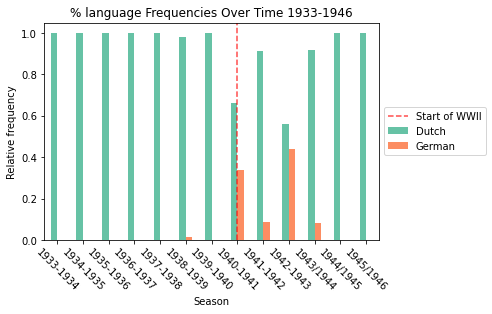

In [11]:
total_counts = counts.sum(axis=1)

# compute the relative frequencies for each language in each season
rel_counts = counts.divide(total_counts, axis=0)

rel_counts.plot(kind='bar')

plt.title('% language Frequencies Over Time 1933-1946')
plt.xlabel('Season')
plt.ylabel('Relative frequency')

plt.axvline(x=counts.index.get_loc('1940-1941'), color='red', alpha=0.7, linestyle='--', label='Start of WWII')

plt.xticks(rotation=-45)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.show()

In [12]:
rel_counts

Leaflet_Language,Dutch,German
Collection,,
1933-1934,1.000000,0.000000
1934-1935,1.000000,0.000000
1935-1936,1.000000,0.000000
1936-1937,1.000000,0.000000
1937-1938,1.000000,0.000000
1938-1939,0.982736,0.017264
1939-1940,1.000000,0.000000
1940-1941,0.662513,0.337487
1941-1942,0.912821,0.087179


# Absolute freqs 1933-1946

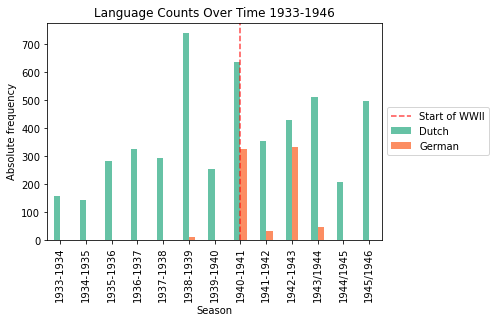

In [13]:
counts.plot(kind='bar')

plt.title('Language Counts Over Time 1933-1946')
plt.xlabel('Season')
plt.ylabel('Absolute frequency')

plt.axvline(x=counts.index.get_loc('1940-1941'), color='red', alpha=0.7, linestyle='--', label='Start of WWII')

#plt.xticks(np.arange(len(x)), x, rotation=-90)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.show()

In [14]:
counts

Leaflet_Language,Dutch,German
Collection,,
1933-1934,157.0,0.0
1934-1935,142.0,0.0
1935-1936,283.0,0.0
1936-1937,325.0,0.0
1937-1938,294.0,0.0
1938-1939,740.0,13.0
1939-1940,254.0,0.0
1940-1941,638.0,325.0
1941-1942,356.0,34.0
